In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid-19-data/us-counties.csv")
cook_counties = df[((df["county"]=="Cook") & (df["state"]=="Illinois"))]

In [3]:
cook_counties

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
11,2020-01-26,Cook,Illinois,17031.0,1,0
16,2020-01-27,Cook,Illinois,17031.0,1,0
21,2020-01-28,Cook,Illinois,17031.0,1,0
...,...,...,...,...,...,...
431680,2020-08-14,Cook,Illinois,17031.0,114724,4951
434905,2020-08-15,Cook,Illinois,17031.0,115344,4953
438131,2020-08-16,Cook,Illinois,17031.0,115960,4962
441357,2020-08-17,Cook,Illinois,17031.0,116620,4964


In [4]:
# Get the daily death count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"]
    else:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "deaths"]

/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
# Get the daily case count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"]
    else:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "cases"]

In [6]:
last_60 = cook_counties.tail(60)

In [7]:
last_60

,date,county,state,fips,cases,deaths,daily_deaths,daily_cases
256319,2020-06-20,Cook,Illinois,17031.0,86885,4390,27.0,334.0
259446,2020-06-21,Cook,Illinois,17031.0,87177,4404,14.0,292.0
262574,2020-06-22,Cook,Illinois,17031.0,87424,4423,19.0,247.0
265704,2020-06-23,Cook,Illinois,17031.0,87784,4439,16.0,360.0
268835,2020-06-24,Cook,Illinois,17031.0,88138,4478,39.0,354.0
271973,2020-06-25,Cook,Illinois,17031.0,88650,4500,22.0,512.0
275116,2020-06-26,Cook,Illinois,17031.0,89068,4526,26.0,418.0
278265,2020-06-27,Cook,Illinois,17031.0,89407,4536,10.0,339.0
281415,2020-06-28,Cook,Illinois,17031.0,89755,4542,6.0,348.0
284562,2020-06-29,Cook,Illinois,17031.0,90122,4554,12.0,367.0


In [8]:
past_30 = cook_counties.tail(30)
past_30

,date,county,state,fips,cases,deaths,daily_deaths,daily_cases
351289,2020-07-20,Cook,Illinois,17031.0,99052,4777,1.0,382.0
354492,2020-07-21,Cook,Illinois,17031.0,99464,4788,11.0,412.0
357695,2020-07-22,Cook,Illinois,17031.0,100124,4801,13.0,660.0
360901,2020-07-23,Cook,Illinois,17031.0,100795,4810,9.0,671.0
364108,2020-07-24,Cook,Illinois,17031.0,101420,4822,12.0,625.0
367315,2020-07-25,Cook,Illinois,17031.0,101955,4829,7.0,535.0
370525,2020-07-26,Cook,Illinois,17031.0,102583,4830,1.0,628.0
373737,2020-07-27,Cook,Illinois,17031.0,103008,4845,15.0,425.0
376952,2020-07-28,Cook,Illinois,17031.0,103441,4857,12.0,433.0
380169,2020-07-29,Cook,Illinois,17031.0,104001,4864,7.0,560.0


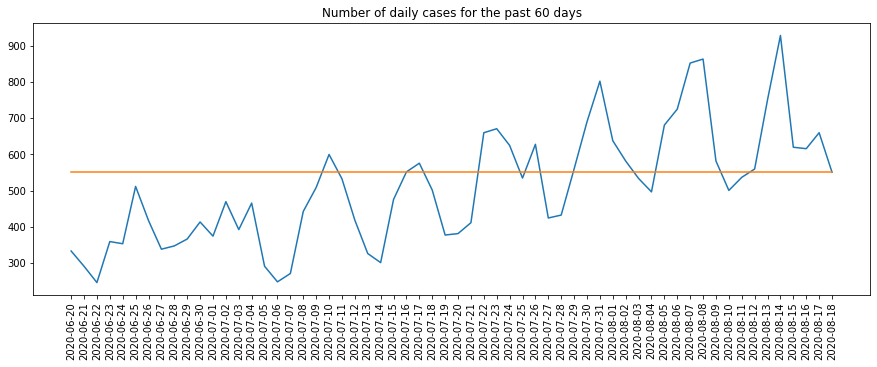

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Number of daily cases for the past 60 days")
ax.plot(last_60["date"], last_60["daily_cases"])
x = [last_60["date"].head(1).values[0], last_60["date"].tail(1).values[0]]
y = [last_60["daily_cases"].tail(1).values[0], last_60["daily_cases"].tail(1).values[0]]
ax.plot(x,y)

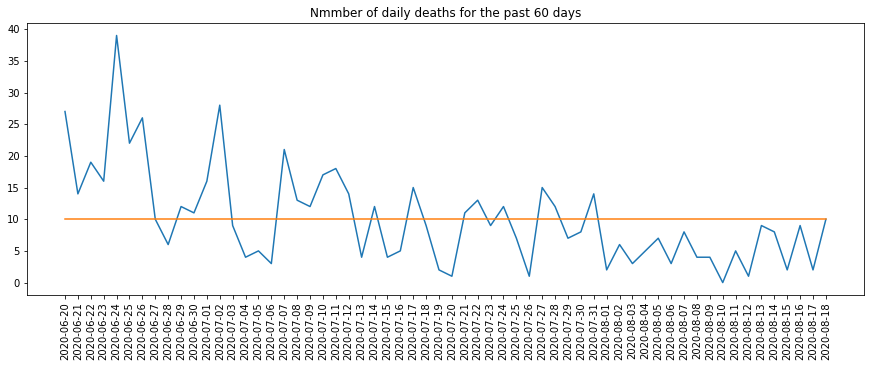

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Nmmber of daily deaths for the past 60 days")
ax.plot(last_60["date"], last_60["daily_deaths"])
x = [last_60["date"].head(1).values[0], last_60["date"].tail(1).values[0]]
y = [last_60["daily_deaths"].tail(1).values[0], last_60["daily_deaths"].tail(1).values[0]]
ax.plot(x,y)

In [11]:
print("Number of daily cases for the past two weeks: \n")
print(last_60["daily_cases"].tail(14).values)

Number of daily cases for the past two weeks: 

[681. 725. 852. 863. 582. 501. 537. 560. 751. 928. 620. 616. 660. 551.]


In [12]:
print("Number of deaths for the past two weeks: \n")
print(last_60["daily_deaths"].tail(14).values)

Number of deaths for the past two weeks: 

[ 7.  3.  8.  4.  4.  0.  5.  1.  9.  8.  2.  9.  2. 10.]
